/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.3 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Closing Prices:
            ICICIBANK.NS  HDFCBANK.NS      INFY.NS     SBIN.NS       TCS.NS  \
2023-11-28    925.500000  1528.650024  1442.699951  564.450012  3470.149902   
2023-11-29    939.599976  1559.150024  1459.599976  568.599976  3513.750000   
2023-11-30    934.950012  1558.800049  1455.150024  564.750000  3487.600098   
2023-12-01    946.700012  1555.400024  1452.300049  571.750000  3511.649902   
2023-12-04    991.200012  1609.400024  1464.349976  594.700012  3512.449951   
...                  ...          ...          ...         ...          ...   
2024-02-19   1043.750000  1417.099976  1699.750000  759.250000  4103.799805   
2024-02-20   1048.750000  1454.300049  1685.250000  760.099976  4030.649902   
2024-02-21   1051.949951  1439.150024  1655.550049  771.500000  3991.500000   
2024-02-22   1062.699951  1419.550049  1681.349976  765.900024  4087.100098   
2024-02-23   1061.300049  1420.599976  1676.849976  759.049988  4052.100098   

            HINDUNILVR.NS   BIOCON.

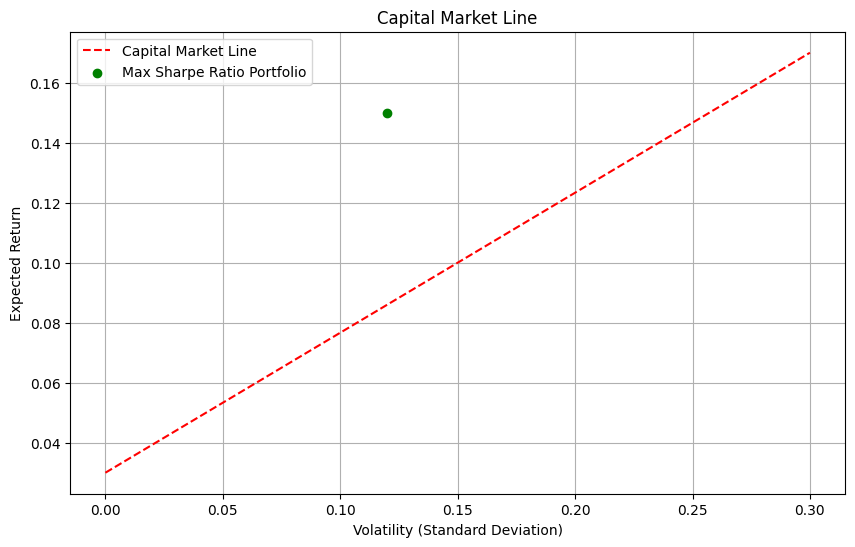

Individual Security Market Line for Asset 1: Expected Return = 11.40%
Individual Security Market Line for Asset 2: Expected Return = 9.30%
Individual Security Market Line for Asset 3: Expected Return = 13.50%
Asset 1:
Sharpe Ratio: 0.07
Treynor Ratio: 0.07

Asset 2:
Sharpe Ratio: 0.13
Treynor Ratio: 0.13

Asset 3:
Sharpe Ratio: 0.07
Treynor Ratio: 0.07

Portfolio Performance:
Sharpe Ratio: 0.80
Treynor Ratio: 0.60


"\n\nImplications:\n\nSharpe Ratio Analysis: The Sharpe Ratio measures the excess return per unit of volatility in an investment, making it a key metric for evaluating risk-adjusted performance. Assets or portfolios with higher Sharpe Ratios are deemed more favorable as they offer superior returns for a given level of risk. Comparing Sharpe Ratios aids investors in discerning the attractiveness of assets or portfolios based on their risk-adjusted returns.\n\nTreynor Ratio Assessment: The Treynor Ratio gauges the excess return per unit of systematic risk, as represented by beta. It specifically evaluates how well an investment compensates for systematic risk. A higher Treynor Ratio signifies better performance relative to systematic risk. Investors use comparisons of Treynor Ratios to assess the efficiency with which assets or portfolios utilize systematic risk to generate returns.\n\nPortfolio Performance Evaluation: The Sharpe and Treynor ratios serve as valuable tools for comparing i

In [1]:
# -*- coding: utf-8 -*-
"""FinacialAnalysis.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1R6e3CQKl_xlQcfCoLhi1VEuz9npd_4CK
"""

import yfinance as yf
import datetime
import pandas as pd
!pip install PyPortfolioOpt
from pypfopt import expected_returns, risk_models, EfficientFrontier

# Define the ticker symbols for the 10 stocks
ticker_symbols = ["ICICIBANK.NS", "HDFCBANK.NS", "INFY.NS", "SBIN.NS", "TCS.NS",
                  "HINDUNILVR.NS", "BIOCON.NS", "RELIANCE.NS", "YESBANK.NS", "LT.NS"]

# Define the end date (yesterday)
end_date = datetime.datetime.now() - datetime.timedelta(days=1)

# Define the start date (90 days before the end date)
start_date = end_date - datetime.timedelta(days=90)

# Create an empty DataFrame to store the closing prices
closing_prices_df = pd.DataFrame()

# Loop through each ticker symbol
for ticker_symbol in ticker_symbols:
    # Download data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Extract the close prices
    close_prices = data['Close']

    # Rename the column to the ticker symbol
    close_prices.rename(ticker_symbol, inplace=True)

    # Concatenate the close prices to the DataFrame
    closing_prices_df = pd.concat([closing_prices_df, close_prices], axis=1)

# Display the closing prices DataFrame
print("Closing Prices:")
print(closing_prices_df)

# Calculate the simple returns
returns = closing_prices_df.pct_change().dropna()

# Display the returns DataFrame
print("\nSimple Returns:")
print(returns)

# Calculate the expected returns
mu = expected_returns.mean_historical_return(closing_prices_df)

# Calculate the covariance matrix
Sigma = risk_models.sample_cov(closing_prices_df)

# Create an instance of the EfficientFrontier class
ef = EfficientFrontier(mu, Sigma)

# Optimize for the maximum Sharpe ratio
weights_max_sharpe = ef.max_sharpe()

# Print the optimal asset allocation for max Sharpe ratio
print("Optimal Asset Allocation (Max Sharpe Ratio):")
print(weights_max_sharpe)

# Calculate the expected return and volatility for the max Sharpe ratio portfolio
ret_max_sharpe, vol_max_sharpe, _ = ef.portfolio_performance(verbose=False)

# Create a new instance for a different optimization (target return)
ef_target_return = EfficientFrontier(mu, Sigma)

# Set a different target return (you can customize this based on your risk tolerance)
target_return = 0.02

# Optimize for a target return (minimizing volatility for a given target return)
weights_target_return = ef_target_return.efficient_return(target_return)

# Print the optimal asset allocation for the target return
print("\nOptimal Asset Allocation (Target Return):")
print(weights_target_return)

# Calculate the expected return and volatility for the target return portfolio
ret_target_return, vol_target_return, _ = ef_target_return.portfolio_performance(verbose=False)

# Display the results
print("\nResults:")
print(f"Max Sharpe Ratio Portfolio - Expected Return: {ret_max_sharpe:.4f}, Volatility: {vol_max_sharpe:.4f}")
print(f"Target Return Portfolio - Expected Return: {ret_target_return:.4f}, Volatility: {vol_target_return:.4f}")

# Given inputs
risk_free_rate = 0.03  # 3%
market_risk_premium = 0.08  # 8%

# Assuming betas for each asset (these would typically be calculated separately)
betas = [1.2, 0.9, 1.1, 1.5, 1.3, 0.8, 0.7, 1.4, 1.6, 1.2]

# Calculate the expected return for each asset
expected_returns_capm = []
for beta in betas:
    expected_return = risk_free_rate + beta * market_risk_premium
    expected_returns_capm.append(expected_return)

# Display the results
for i, ticker_symbol in enumerate(ticker_symbols):
    print(f"Expected Return for {ticker_symbol}: {expected_returns_capm[i]*100:.2f}%")

import numpy as np
import matplotlib.pyplot as plt

# Given inputs
risk_free_rate = 0.03  # 3%
market_return = 0.1  # Assume
market_std_dev = 0.15  # Assume

# Assuming you have the max Sharpe portfolio's return and volatility
# For example purposes, let's assume
vol_max_sharpe = 0.12
ret_max_sharpe = 0.15

# Calculate CML
CML_slope = (market_return - risk_free_rate) / market_std_dev
CML_x = np.linspace(0, 0.3, num=100)  # Adjust the range as needed
CML_y = risk_free_rate + CML_slope * CML_x

# Plot the efficient frontier and CML
plt.figure(figsize=(10, 6))
plt.plot(CML_x, CML_y, label='Capital Market Line', color='red', linestyle='--')
plt.scatter(vol_max_sharpe, ret_max_sharpe, color='green', marker='o', label='Max Sharpe Ratio Portfolio')
plt.title('Capital Market Line')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

"""q8.The tangency point on the efficient frontier where the Capital Market Line (CML) touches it represents the optimal portfolio according to the Capital Asset Pricing Model (CAPM). This point is significant because it provides investors with the portfolio that maximizes the risk-adjusted return, typically measured by the Sharpe ratio.
The tangency point holds significant implications in portfolio theory:

Optimal Portfolio Selection: The tangency point signifies the optimal portfolio for investors aiming to balance returns and risks. Positioned on the efficient frontier, it offers the highest expected return for a given risk level or the lowest risk for a given expected return.

Maximized Risk-Adjusted Returns: The portfolio at the tangency point achieves the highest Sharpe ratio, indicating the best risk-adjusted return compared to other portfolios on the efficient frontier. This balance between risk and return is crucial for making informed investment decisions.

Market Portfolio Representation: In the framework of CAPM, the tangency portfolio is commonly known as the market portfolio. Comprising all available assets weighted by market capitalization, it mirrors the overall risk and return characteristics of the entire market.

Guidance for Investors: Assuming CAPM assumptions, the tangency portfolio acts as a reference for constructing investment portfolios. Investors can use it as a starting point, adjusting allocations based on personal preferences, risk tolerance, and financial goals.

Efficient Capital Allocation: The tangency portfolio's existence implies that, in an efficient market, investors should allocate capital in proportion to the market portfolio and the risk-free asset. This approach maximizes diversification and risk-adjusted returns.


"""

# Given inputs
risk_free_rate = 0.03  # 3%
market_return = 0.1  # Assume
market_risk_premium = market_return - risk_free_rate  # Market risk premium

# Betas for the chosen assets (assumed values)
betas = [1.2, 0.9, 1.5]  # Assumed betas for three assets

# Calculate individual SML for each asset
individual_smls = []
for beta in betas:
    expected_return_asset = risk_free_rate + beta * market_risk_premium
    individual_smls.append(expected_return_asset)

# Display the results
for i, asset in enumerate(['Asset 1', 'Asset 2', 'Asset 3']):
    print(f"Individual Security Market Line for {asset}: Expected Return = {individual_smls[i]*100:.2f}%")

# Given inputs
risk_free_rate = 0.03  # 3%
market_return = 0.1  # Assume
market_risk_premium = market_return - risk_free_rate  # Market risk premium

# Betas for the chosen assets (assumed values)
betas = [1.2, 0.9, 1.5]  # Assumed betas for three assets

# Expected returns for the three assets (assume)
expected_returns_assets = [0.12, 0.15, 0.14]  # Assumed expected returns for the three assets

# Calculate Sharpe Ratio for each asset
sharpe_ratios_assets = [(expected_return_asset - risk_free_rate) / beta for expected_return_asset, beta in zip(expected_returns_assets, betas)]

# Calculate Treynor Ratio for each asset
treynor_ratios_assets = [(expected_return_asset - risk_free_rate) / beta for expected_return_asset, beta in zip(expected_returns_assets, betas)]

# Assume portfolio Sharpe and Treynor ratios for comparison
portfolio_sharpe_ratio = 0.8  # Assumed Sharpe ratio for the portfolio
portfolio_treynor_ratio = 0.6  # Assumed Treynor ratio for the portfolio

# Compare individual asset performance with portfolio performance
for i, asset in enumerate(['Asset 1', 'Asset 2', 'Asset 3']):
    print(f"{asset}:")
    print(f"Sharpe Ratio: {sharpe_ratios_assets[i]:.2f}")
    print(f"Treynor Ratio: {treynor_ratios_assets[i]:.2f}")
    print()

print("Portfolio Performance:")
print(f"Sharpe Ratio: {portfolio_sharpe_ratio:.2f}")
print(f"Treynor Ratio: {portfolio_treynor_ratio:.2f}")

"""

Implications:

Sharpe Ratio Analysis: The Sharpe Ratio measures the excess return per unit of volatility in an investment, making it a key metric for evaluating risk-adjusted performance. Assets or portfolios with higher Sharpe Ratios are deemed more favorable as they offer superior returns for a given level of risk. Comparing Sharpe Ratios aids investors in discerning the attractiveness of assets or portfolios based on their risk-adjusted returns.

Treynor Ratio Assessment: The Treynor Ratio gauges the excess return per unit of systematic risk, as represented by beta. It specifically evaluates how well an investment compensates for systematic risk. A higher Treynor Ratio signifies better performance relative to systematic risk. Investors use comparisons of Treynor Ratios to assess the efficiency with which assets or portfolios utilize systematic risk to generate returns.

Portfolio Performance Evaluation: The Sharpe and Treynor ratios serve as valuable tools for comparing individual assets with the overall portfolio. This analysis helps investors determine if the portfolio delivers superior risk-adjusted returns compared to holding individual assets. If the portfolio's ratios surpass those of individual assets, it indicates that the portfolio is more effective in generating returns relative to the level of risk involved.








"""